## Baseline метода без сезонной компоненты

In [33]:
import pandas as pd
from matplotlib import pyplot
from numpy import asarray
from pandas import DataFrame, concat
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [34]:
# Считываем данные
data = pd.read_csv("https://raw.githubusercontent.com/dmitry-chvdr/aqi_prediction/Checkpoint4/ts_air_quality_index_2013_2020.csv")
data = data[["aqi", "Date"]]
ts_wage = data.set_index("Date").sort_index()

# Как работает

def series_for_learn(): <br>
def walk_forward_validation():<br>
    def train_test_split():<br>
    def random_forest_forecast():<br>
   


def series_for_learn():<br>
    Преобразование временного ряда  с помощью скользящего окна в DF для обучения.<br>
    
    index  val-1 val val+1
       1     0    10   Nan
       2     10   11    10
       3     11   12    11
       4     12   Nan   12
       
    Формируется DF вида:
    
    (t-n)....(t-1)   (t)   (t+1)...(t+n)
    _____n_in____  target  ____n_out___
    
    Удаление пропущенныех
    
    => arrey([[125,79,67,62],
              [79,67,62,67],
              .............
              [...........]])

def walk_forward_validation():<br>
    def train_test_split():<br>
    
    Тут просто разбиение на тренировочный и тестовый набор данных (train, test)
    
Создание history = копии (train)<br>
    
(mae, y, yhat = walk_forward_validation(data, число предсказанных значений)

Теперь цикл равный числу предсказынных значений<br>
    -Разбиваем test на testX and testy<br>
    -Обучаем RF(histiry, testX)<br>
    -Выдаем предсказание на testX<br>
Записываем предсказание в список prediction<br>
Добавялем в history предсказание<br>

Повторяем обучение на новом history<br>






# Сразу эксперименты

data = series_to_learn(values, n_in=15, n_out=1)<br>
mae, y, yhat = walk_forward_validation(data, 6)

>expected=48.0, predicted=45.0
>expected=40.0, predicted=46.3
>expected=61.0, predicted=46.5
>expected=50.0, predicted=77.1
>expected=52.0, predicted=47.1
>expected=14.0, predicted=53.8
MAE: 15.920


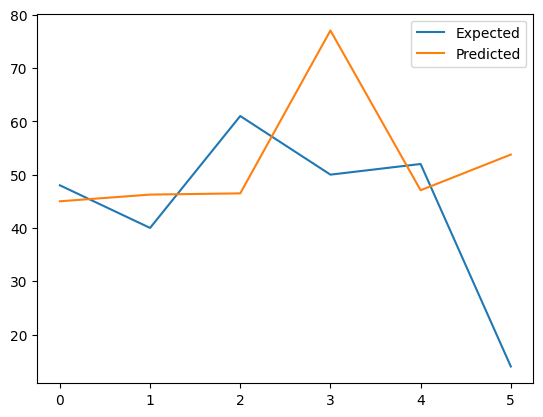

In [4]:
# изменяем исходный датасет
def series_to_learn(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]


# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print(">expected=%.1f, predicted=%.1f" % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


# Загрузка датасета
series = ts_wage
values = series.values
# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=15, n_out=1)
# оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 6)
print("MAE: %.3f" % mae)
# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label="Expected")
pyplot.plot(yhat, label="Predicted")
pyplot.legend()
pyplot.show()

## По 215 значениям, предказываем 15 будущих.

>expected=61.0, predicted=68.5
>expected=61.0, predicted=68.1
>expected=63.0, predicted=68.3
>expected=60.0, predicted=69.4
>expected=51.0, predicted=66.5
>expected=46.0, predicted=86.8
>expected=46.0, predicted=63.0
>expected=43.0, predicted=53.5
>expected=38.0, predicted=67.5
>expected=48.0, predicted=47.4
>expected=40.0, predicted=49.1
>expected=61.0, predicted=59.0
>expected=50.0, predicted=72.6
>expected=52.0, predicted=101.5
>expected=14.0, predicted=56.3
MAE: 17.915


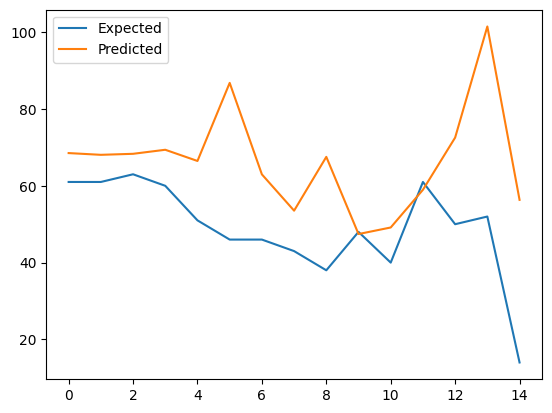

In [31]:
# изменяем исходный датасет
def series_to_learn(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]


# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print(">expected=%.1f, predicted=%.1f" % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


# Загрузка датасета
series = ts_wage
values = series.values
# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=200, n_out=15)
# оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 15)
print("MAE: %.3f" % mae)
# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label="Expected")
pyplot.plot(yhat, label="Predicted")
pyplot.legend()
pyplot.show()

## По 30 значениям предсказывает 15 будущих.

>expected=61.0, predicted=67.8
>expected=61.0, predicted=68.5
>expected=63.0, predicted=67.4
>expected=60.0, predicted=67.0
>expected=51.0, predicted=67.0
>expected=46.0, predicted=52.1
>expected=46.0, predicted=50.8
>expected=43.0, predicted=49.2
>expected=38.0, predicted=49.9
>expected=48.0, predicted=46.4
>expected=40.0, predicted=50.8
>expected=61.0, predicted=45.9
>expected=50.0, predicted=78.0
>expected=52.0, predicted=48.5
>expected=14.0, predicted=54.0
MAE: 11.308


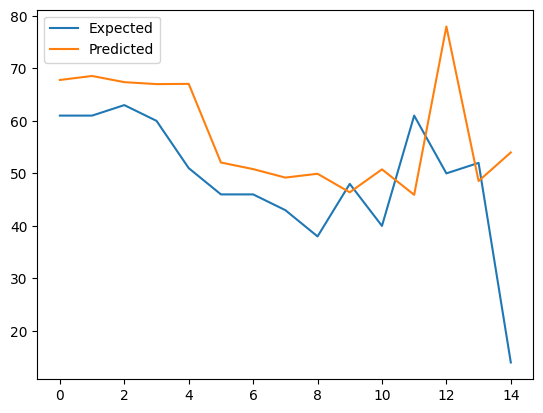

In [3]:
# изменяем исходный датасет
def series_to_learn(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]


# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print(">expected=%.1f, predicted=%.1f" % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


# Загрузка датасета
series = ts_wage
values = series.values
# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=15, n_out=15)
# оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 15)
print("MAE: %.3f" % mae)
# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label="Expected")
pyplot.plot(yhat, label="Predicted")
pyplot.legend()
pyplot.show()

### Это предсказание 1-го значения по модели.

In [18]:
# load the dataset
# transform the time series data into supervised learning
train = series_to_learn(values, n_in=30)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-30:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print("Input: %s, Predicted: %.3f" % (row, yhat[0]))

Input: [117  86  78  75  63  78 104 102  81  93  97  85  64  66  65  61  61  63
  60  51  46  46  43  38  48  40  61  50  52  14], Predicted: 44.852
